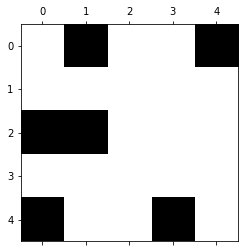

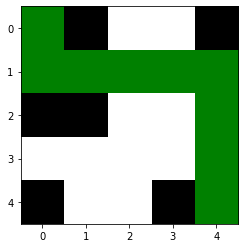

In [57]:
%run a_star.ipynb
import time

In [58]:
def repeated_astarq6():
    global maze_size
    agent_matrix = np.asmatrix(np.zeros(maze_size*maze_size).reshape(maze_size,maze_size))
    goal_reached = False
    goal = (n-1,n-1)
    path = []
    final_path = [(0,0)]
    trajectory_length = 0
#     num_of_cells =0
    tot_time_planning = 0
    bumped = 0
    
    while not goal_reached:
        start_time = time.time()
        path = astar(final_path[-1],goal,agent_matrix)
        print(agent_matrix, "start:",final_path[-1])
        print(path)
#         num_of_cells += astar_num_cells
        tot_time_planning += (time.time() - start_time)
        if(path == []):
            return (0,[],0,0)
        
        for node in path:
            x = node[0]
            y = node[1]
            if x+1<n and grid[(x+1,y)] == 1:
                agent_matrix[(x+1,y)] = 1
            if x-1>=0 and grid[(x-1,y)] == 1:
                agent_matrix[(x-1,y)] = 1
            if y+1<n and grid[(x,y+1)] == 1:
                agent_matrix[(x,y+1)] = 1
            if y-1>=0 and grid[(x,y-1)] == 1:
                agent_matrix[(x,y-1)] = 1
            if grid[node] == 0:
#                 print("node: ",node[:2]," is unblocked")
                if node not in final_path:
                    final_path.append(node)
                    trajectory_length += 1
                if node == goal:
                    goal_reached = True
                    break
            else:
                agent_matrix[node] = 1
                trajectory_length += 2
                bumped += 1
                break
    shortest_path_final_discovered_gridworld= astar((0,0),goal,agent_matrix)
    return (trajectory_length, shortest_path_final_discovered_gridworld, tot_time_planning, bumped)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] start: (0, 0)
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] start: (0, 3)
[(0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]


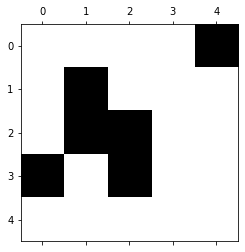

In [64]:
n=5
initialize(n,0.3)
plt.spy(grid)
traj_length, path, time, bumped = repeated_astarq6()

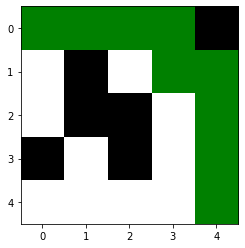

In [65]:
display2(path,grid)